<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# TS5:Primeros pasitos en la estimación espectral
#### Pablo Romero


# Consigna
Se pide:

a) Sea k0={N/4,N/4+0.25,N/4+0.5}
. Notar que a cada senoidal se le agrega una pequeña desintonía respecto a  Δf
. Graficar las tres densidades espectrales de potencia (PDS's) y discutir cuál es el efecto de dicha desintonía en el espectro visualizado.

b) Verificar la potencia unitaria de cada PSD. En base a la teoría estudiada, ¿cuál es la razón por la cual una señal senoidal tiene un espectro (PSD) tan diferente respecto a otra de muy pocos Hertz de diferencia?




In [25]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

from numpy.fft import fft
import matplotlib.pyplot as plt
import scipy.signal as sig


#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

##############################################
#%% A partir de aquí comienza lo IMPORTANTE #
#############################################
 
vmax=1       #Amplitud Maxima [Volts]
dc=0            #Valor de continua [Volts]
f0=1 #Frecuencia en [Hz][]
ph=np.pi*1   #Fase [rad]
nn=1000  #Muestras del ADC
fs=1000#Frecuencia de muestreio del ADC [Hz]
k0=nn/4
f0=k0*fs/nn #Frecuencia en [Hz][]         
Ts=1/fs
delta_f=fs/nn
B_bits=4
vf=2
SNRa=25

# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = nn*over_sampling
fs_os=fs*over_sampling

def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):

    tt = np.arange(0.0, nn/fs, 1/fs)
    # aux = tt * 2*np.pi*ff

    xx = (np.sin(2*np.pi*ff*tt+ph))*vmax + dc

    return tt,xx



# vmax=np.sqrt(2)
tt, xx_sen1 = mi_funcion_sen(vmax, dc, f0, ph*0, nn, fs)
tt, xx_sen2 = mi_funcion_sen(vmax, dc, f0+0.25, ph*0, nn, fs)
tt, xx_sen3 = mi_funcion_sen(vmax, dc, f0+0.5, ph*0, nn, fs)
tt, xx_sen4 = mi_funcion_sen(vmax, dc, f0+0.75, ph*0, nn, fs)

xx_sen1=xx_sen1/np.sqrt(np.var(xx_sen1))
xx_sen2=xx_sen2/np.sqrt(np.var(xx_sen2))
xx_sen3=xx_sen3/np.sqrt(np.var(xx_sen3))
xx_sen4=xx_sen4/np.sqrt(np.var(xx_sen4))


#En esta primer representacion no aplicamos zero padding
zero_padd = 0
xx_sen1 = np.append(xx_sen1, np.zeros(zero_padd*nn))
xx_sen2 = np.append(xx_sen2, np.zeros(zero_padd*nn)) 
xx_sen3 = np.append(xx_sen3, np.zeros(zero_padd*nn)) 
xx_sen4 = np.append(xx_sen4, np.zeros(zero_padd*nn))  

XX_sen1=fft(xx_sen1)/xx_sen1.shape[0]
XX_sen2=fft(xx_sen2)/xx_sen2.shape[0]
XX_sen3=fft(xx_sen3)/xx_sen3.shape[0]
XX_sen4=fft(xx_sen4)/xx_sen4.shape[0]

ff1= np.arange(0.0, fs, fs/((zero_padd+1)*nn))
# ff2= np.arange(0.0, fs, fs/nn)

bfrec = ff1 <= fs/2

Area1= np.sum(2*np.abs(XX_sen1[bfrec])**2)
Area2= np.sum(2*np.abs(XX_sen2[bfrec])**2)
Area3= np.sum(2*np.abs(XX_sen3[bfrec])**2)
Area4= np.sum(2*np.abs(XX_sen4[bfrec])**2)





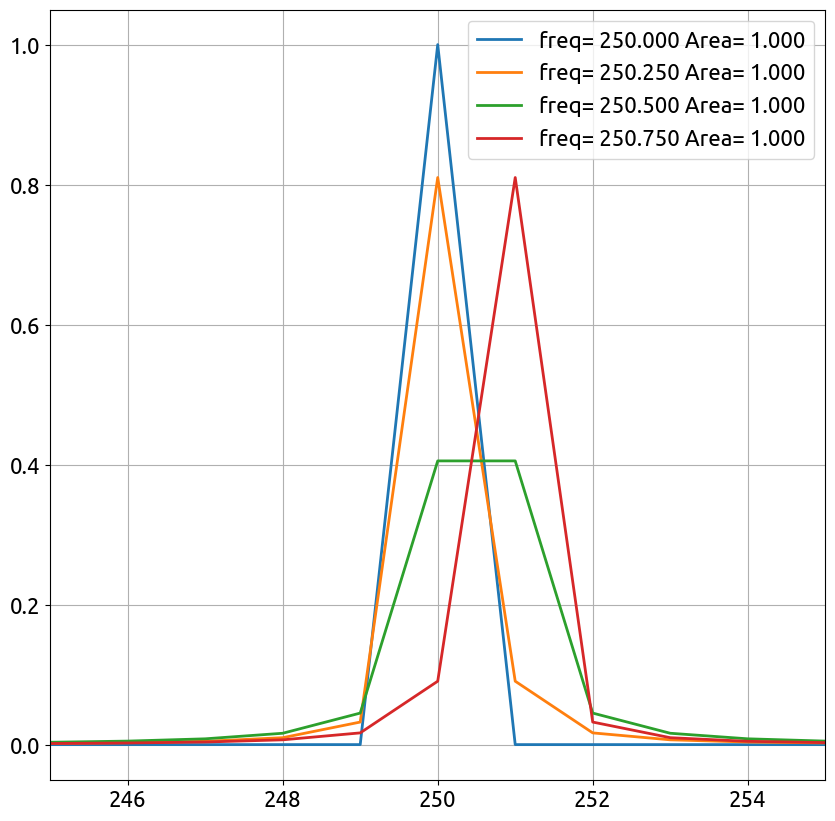

In [26]:
plt.figure(1)
plt.clf()
 
plt.plot( ff1[bfrec], (2*np.abs(XX_sen1[bfrec])**2), lw=2, label='freq= {:3.3f} Area= {:3.3f}'.format(f0, Area1))
plt.plot( ff1[bfrec], (2*np.abs(XX_sen2[bfrec])**2), lw=2, label='freq= {:3.3f} Area= {:3.3f}'.format(f0+0.25, Area2))
plt.plot( ff1[bfrec], (2*np.abs(XX_sen3[bfrec])**2), lw=2, label='freq= {:3.3f} Area= {:3.3f}'.format(f0+0.5, Area3))
plt.plot( ff1[bfrec], (2*np.abs(XX_sen4[bfrec])**2), lw=2, label='freq= {:3.3f} Area= {:3.3f}'.format(f0+0.75, Area4))
# plt.plot(tt, xx_d, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
axes_hdl = plt.gca()
axes_hdl.legend()
axes_hdl.grid()
axes_hdl.set_xlim([f0-5,f0+5])
axes_hdl.legend()


plt.show()

Respondiento el punto "a)" graficamos las senoidales en f0, f0+0.25, f0+0.5 y f0+0.75 y verificamos que la potencia es unitaria para todos los casos, como nos pide el punto "b)". Apesar de esto por la desintonia de f0, la cual hace que esas senoidales no sean multiplos de la resolucion espectral y el efecto grafico que es justamente, no tenemos resolucion para representar esos valores, y aparecen "fetas" del valor de convolucionar la delta de las distintas senoidales con la delta de dirichlet en valores multiplos de la resolucion espectral.

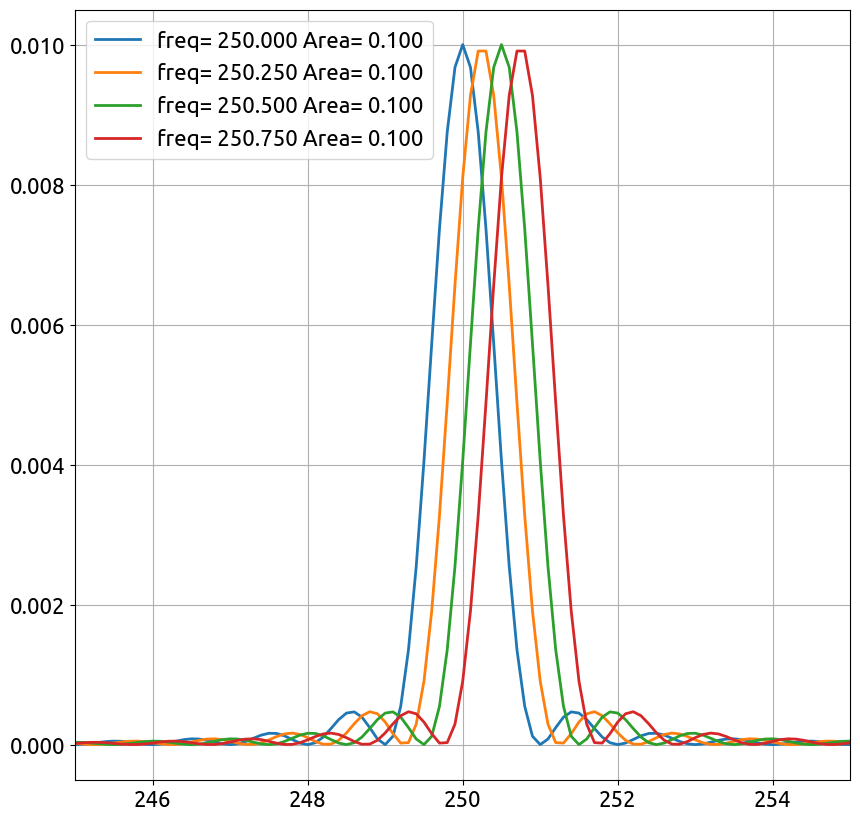

In [27]:
zero_padd = 9
xx_sen1 = np.append(xx_sen1, np.zeros(zero_padd*nn))
xx_sen2 = np.append(xx_sen2, np.zeros(zero_padd*nn)) 
xx_sen3 = np.append(xx_sen3, np.zeros(zero_padd*nn)) 
xx_sen4 = np.append(xx_sen4, np.zeros(zero_padd*nn))  

XX_sen1=fft(xx_sen1)/xx_sen1.shape[0]
XX_sen2=fft(xx_sen2)/xx_sen2.shape[0]
XX_sen3=fft(xx_sen3)/xx_sen3.shape[0]
XX_sen4=fft(xx_sen4)/xx_sen4.shape[0]

ff1= np.arange(0.0, fs, fs/((zero_padd+1)*nn))
# ff2= np.arange(0.0, fs, fs/nn)

bfrec = ff1 <= fs/2

Area1= np.sum(2*np.abs(XX_sen1[bfrec])**2)
Area2= np.sum(2*np.abs(XX_sen2[bfrec])**2)
Area3= np.sum(2*np.abs(XX_sen3[bfrec])**2)
Area4= np.sum(2*np.abs(XX_sen4[bfrec])**2)

plt.figure(2)
plt.clf()
 
plt.plot( ff1[bfrec], (2*np.abs(XX_sen1[bfrec])**2), lw=2, label='freq= {:3.3f} Area= {:3.3f}'.format(f0, Area1))
plt.plot( ff1[bfrec], (2*np.abs(XX_sen2[bfrec])**2), lw=2, label='freq= {:3.3f} Area= {:3.3f}'.format(f0+0.25, Area2))
plt.plot( ff1[bfrec], (2*np.abs(XX_sen3[bfrec])**2), lw=2, label='freq= {:3.3f} Area= {:3.3f}'.format(f0+0.5, Area3))
plt.plot( ff1[bfrec], (2*np.abs(XX_sen4[bfrec])**2), lw=2, label='freq= {:3.3f} Area= {:3.3f}'.format(f0+0.75, Area4))
# plt.plot(tt, xx_d, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
axes_hdl = plt.gca()
axes_hdl.legend()
axes_hdl.grid()
axes_hdl.set_xlim([f0-5,f0+5])
axes_hdl.legend()


plt.show()



En esta representacion dejamos todo igual que la representacion anterior, pero aplicando zero padding. Agregamos 9000 ceros al final, lo que representa agrendar la ventana rectangular con la que se convoluciono la senoidal y runa mejor resolucion espectral. Por lo que ahora la resultante es la delta de dirichlet centrada en cada la frecuencia de cada senoidal (ahora todas las frecuencias utilizadas con multiplo de la resolucion espectral conseguida)



Fin del documento